In [2]:
import pandas as pd

dados = pd.read_csv('/content/CC GENERAL.csv')

In [3]:
dados.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
dados.drop(columns=['CUST_ID', 'TENURE'], inplace=True)

In [5]:
dados.isna().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
dtype: int64

In [6]:
dados.fillna(dados.median(), inplace=True)

In [7]:
dados.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
dtype: int64

In [8]:
from sklearn.preprocessing import Normalizer

values = Normalizer().fit_transform(dados.values)
print(values)

[[3.93555441e-02 7.87271593e-04 9.17958473e-02 ... 1.94178127e-01
  1.34239194e-01 0.00000000e+00]
 [2.93875903e-01 8.34231560e-05 0.00000000e+00 ... 3.76516684e-01
  9.84037959e-02 2.03923046e-05]
 [3.10798149e-01 1.24560965e-04 9.63068011e-02 ... 7.74852335e-02
  7.81351982e-02 0.00000000e+00]
 ...
 [2.27733092e-02 8.11060955e-04 1.40540698e-01 ... 7.90986945e-02
  8.02156174e-02 2.43318384e-04]
 [2.65257948e-02 1.64255731e-03 0.00000000e+00 ... 1.03579625e-01
  1.09898221e-01 4.92767391e-04]
 [1.86406219e-01 3.33426837e-04 5.46778061e-01 ... 3.15915455e-02
  4.41568390e-02 0.00000000e+00]]


In [9]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, n_init=10, max_iter=300)
y_pred = kmeans.fit_predict(values)

In [10]:
from sklearn import metrics

labels = kmeans.labels_
silhouette = metrics.silhouette_score(values, labels, metric='euclidean')
silhouette

0.36454479258047573

In [11]:
dbs = metrics.davies_bouldin_score(values, labels)
dbs

1.0760464906093192

In [12]:
calinksi = metrics.calinski_harabasz_score(values, labels)
calinksi

3431.7903477169225

In [18]:
def clustering_algorithm(n_clusters, dataset):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, max_iter=300)
    labels = kmeans.fit_predict(dataset)
    s = metrics.silhouette_score(dataset, labels, metric='euclidean')
    dbs = metrics.davies_bouldin_score(dataset, labels)
    calinski = metrics.calinski_harabasz_score(dataset, labels)
    return s, dbs, calinski

In [19]:
s1, dbs1, calinski1 = clustering_algorithm(3, values)
print(s1, dbs1, calinski1)

0.3272203126696238 1.3096073640088426 3526.440519908274


In [20]:
s2, dbs2, calinksi2 = clustering_algorithm(5, values)
print(s2, dbs2, calinksi2)

0.3645268652444429 1.0758562764119166 3431.788779759367


In [26]:
s3, dbs3, calinksi3 = clustering_algorithm(10, values)
print(s3, dbs3, calinksi3)

0.30517977556722575 1.1553704915972551 3017.8164125723374


In [27]:
import numpy as np
random_data = np.random.rand(8950, 16)
s, dbs, calinksi = clustering_algorithm(5, random_data)
print(s, dbs, calinksi)
print(s2, dbs2, calinksi2)

0.03983109482661759 3.487213709660864 302.84984740395447
0.3645268652444429 1.0758562764119166 3431.788779759367


In [28]:
set1, set2, set3 = np.array_split(values, 3)
s1, dbs1, calinksi1 = clustering_algorithm(5, set1)
s2, dbs2, calinksi2 = clustering_algorithm(5, set2)
s3, dbs3, calinksi3 = clustering_algorithm(5, set3)
print(s1, dbs1, calinksi1)
print(s2, dbs2, calinksi2)
print(s3, dbs3, calinksi3)

0.36871947128237154 1.0562346825020208 1204.111511065027
0.3532728286985019 1.1428565512257927 1194.9397359958468
0.36693529107295353 1.0991899016658433 1167.5326839969478


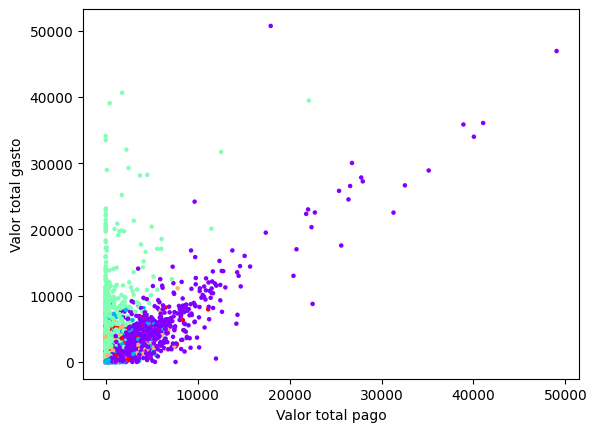

In [37]:
import matplotlib.pyplot as plt

plt.scatter(dados['PURCHASES'], dados['PAYMENTS'], c=labels, s=5, cmap='rainbow')
plt.xlabel('Valor total pago')
plt.ylabel('Valor total gasto')
plt.show;

In [38]:
import seaborn as sns
dados['cluster'] = labels
sns.pairplot(dados[0:], hue='cluster')
#Demorou para rodar mas gera 256 gráficos

In [39]:
dados.groupby('cluster').describe()

BALANCE                                                    \
          count         mean          std        min          25%   
cluster                                                             
0        1536.0  1141.865757  1664.809840   0.000000   212.178230   
1        3279.0   443.776995   846.525522   0.000000    23.340435   
2        1073.0  1795.328292  1982.485775   0.000000   507.076999   
3        2650.0  3036.946177  2478.922442   6.824905  1255.154881   
4         412.0  1987.146873  1852.215743  70.794108  1020.146724   

                                                BALANCE_FREQUENCY            \
                 50%          75%           max             count      mean   
cluster                                                                       
0         554.332740  1370.056708  19043.138560            1536.0  0.928220   
1          82.902896   410.659944   9630.367575            3279.0  0.774514   
2        1088.056301  2315.003636  14581.459140            1073.0  0.862260   
3        2173.994774  4223.858877  18495.558550            2650.0  0.963514   
4        1338.918346  2133.415063  11670.179850             412.0  0.989512   

         ... MINIMUM_PAYMENTS               PRC_FULL_PAYMENT            \
         ...              75%           max            count      mean   
cluster  ...                                                             
0        ...       523.540210  18621.013310           1536.0  0.278331   
1        ...       248.766884   4483.503862           3279.0  0.246881   
2        ...       884.183626  21235.065300           1073.0  0.117430   
3        ...      1330.541571   8345.641905           2650.0  0.001798   
4        ...      7086.774783  76406.207520            412.0  0.019271   

                                                      
              std  min  25%       50%       75%  max  
cluster                                               
0        0.367137  0.0  0.0  0.083333  0.545455  1.0  
1        0.346775  0.0  0.0  0.000000  0.444444  1.0  
2        0.186772  0.0  0.0  0.083333  0.142857  1.0  
3        0.023256  0.0  0.0  0.000000  0.000000  0.6  
4        0.090795  0.0  0.0  0.000000  0.000000  1.0  

[5 rows x 128 columns]

In [41]:
centroids = kmeans.cluster_centers_
print(centroids)

[[1.60105064e-01 2.45216495e-04 4.38561405e-01 2.57200631e-01
  1.81532508e-01 2.58728121e-02 2.04312848e-04 8.90625500e-05
  1.50516286e-04 9.39341912e-06 1.69901859e-04 6.17654349e-03
  6.03940941e-01 4.02431241e-01 8.53054178e-02 7.19457109e-05]
 [6.89799575e-02 2.30763006e-04 1.21587120e-01 4.79794677e-02
  7.37079733e-02 2.40200669e-02 1.73016299e-04 3.36944404e-05
  1.40456777e-04 7.83464589e-06 1.22859223e-04 2.86637386e-03
  9.43639117e-01 1.53810130e-01 5.68564456e-02 7.61967577e-05]
 [2.35130689e-01 2.16418717e-04 6.04525670e-02 3.44569238e-02
  2.60008529e-02 3.99755165e-01 5.26563547e-05 2.05235176e-05
  3.52245850e-05 6.54254245e-05 1.57052528e-03 1.12425758e-03
  5.35275552e-01 5.98057989e-01 1.04294158e-01 2.77348362e-05]
 [5.03886149e-01 2.72144714e-04 6.15751915e-02 3.61893482e-02
  2.54075483e-02 2.53219709e-01 6.71312176e-05 2.56644637e-05
  4.48814714e-05 5.75359114e-05 1.15794119e-03 1.32612254e-03
  7.19404134e-01 1.66061928e-01 1.79050745e-01 5.79660872e-07]
 [3.

In [45]:
max = len(centroids[0])
for i in range(max):
  print(dados.columns.values[i], '{:.4f}'.format(centroids[:, i].var()))

BALANCE 0.0224
BALANCE_FREQUENCY 0.0000
PURCHASES 0.0197
ONEOFF_PURCHASES 0.0077
INSTALLMENTS_PURCHASES 0.0036
CASH_ADVANCE 0.0225
PURCHASES_FREQUENCY 0.0000
ONEOFF_PURCHASES_FREQUENCY 0.0000
PURCHASES_INSTALLMENTS_FREQUENCY 0.0000
CASH_ADVANCE_FREQUENCY 0.0000
CASH_ADVANCE_TRX 0.0000
PURCHASES_TRX 0.0000
CREDIT_LIMIT 0.0360
PAYMENTS 0.0280
MINIMUM_PAYMENTS 0.0541
PRC_FULL_PAYMENT 0.0000


In [51]:
description = dados.groupby("cluster")[["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS"]]
n_clients = description.size()
description = description.mean()
description['n_clients'] = n_clients
print(description)

             BALANCE    PURCHASES  CASH_ADVANCE  CREDIT_LIMIT     PAYMENTS  \
cluster                                                                      
0        1141.865757  3274.071901    183.496011   4098.802182  3037.137165   
1         443.776995   629.282729    140.652097   5130.892579   814.340168   
2        1795.328292   476.810531   3267.199032   3982.452201  4713.384730   
3        3036.946177   385.299102   1637.380994   4495.584906   968.775192   
4        1987.146873   858.326286    420.107194   2226.699029  1338.974045   

         n_clients  
cluster             
0             1536  
1             3279  
2             1073  
3             2650  
4              412  


CLUSTER 0: Clientes que gastam muito com compras. Melhores pagadores.

CLUSTER 1: Clientes que gastam pouco. Clientes com o maior limite. Bons pagadores. Maior número de clientes.

CLUSTER 2: Clientes que gastam muito com saques. Pagam as vezes.

CLUSTER 3: Clientes que mais gastam. O foco deles é o saque. Piores pagadores. Boa quantidade de clientes.

CLUSTER 4: Clientes com o menor limite. Não são bons pagadores. Menor quantidade de clientes.

In [53]:
dados.groupby("cluster")["PRC_FULL_PAYMENT"].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,1536.0,0.278331,0.367137,0.0,0.0,0.083333,0.545455,1.0
1,3279.0,0.246881,0.346775,0.0,0.0,0.000000,0.444444,1.0
2,1073.0,0.117430,0.186772,0.0,0.0,0.083333,0.142857,1.0
3,2650.0,0.001798,0.023256,0.0,0.0,0.000000,0.000000,0.6
4,412.0,0.019271,0.090795,0.0,0.0,0.000000,0.000000,1.0
